In [6]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

harold_portfolio_path = Path("../../Resources/harold_portfolio.csv")
my_portfolio_path = Path("../../Resources/my_portfolio.csv")

# Read in data
harold_portfolio = pd.read_csv(harold_portfolio_path, parse_dates=True, infer_datetime_format=True)
my_portfolio = pd.read_csv(my_portfolio_path, parse_dates=True, infer_datetime_format=True)

# Drop na
# harold_portfolio = harold_portfolio.dropna()
# my_portfolio = my_portfolio.dropna()

# Set Date as index
harold_portfolio = harold_portfolio.set_index('Date')
my_portfolio = my_portfolio.set_index('Date')

# harold_portfolio.sort_index(ascending=True, inplace=True)
# my_portfolio.sort_index(ascending=True, inplace=True)

harold_1yr = harold_portfolio.loc['2019-05-20':'2018-05-20']
harold_returns = harold_1yr.pct_change()
harold_std = harold_returns.std()

my_1yr = my_portfolio.loc['2019-05-20':'2018-05-20']
my_returns = my_1yr.pct_change()
my_std = my_returns.std()

all_returns = pd.concat([harold_returns, my_returns], axis='columns', join='inner')
all_returns

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,,,,,,,,,,,
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-19,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823
2019-05-18,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-24,0.016763,0.000000,-0.035120,-0.042786,-0.033661,0.003287,0.000000,0.000000,0.019677,0.000000,-0.010436,-0.035120,-0.042786,-0.033661,0.003287,-0.013263
2018-05-23,-0.010436,0.000000,-0.033388,0.109667,0.077913,-0.023028,0.000000,0.000000,-0.023078,0.000000,0.064317,-0.033388,0.109667,0.077913,-0.023028,-0.007322
2018-05-22,0.064317,0.000000,0.044734,0.087853,0.048006,0.014786,0.000000,0.000000,0.047297,0.000000,0.050796,0.044734,0.087853,0.048006,0.014786,0.036809


In [5]:
all_portfolio_std = all_returns.std()
all_portfolio_std

BTC      0.035607
BTT      0.013236
DOGE     0.051477
ETH      0.053925
LTC      0.052210
XRP      0.049723
SOLVE    0.011079
XLM      0.022277
TRON     0.053351
ZIL      0.022726
BTC      0.035649
DOGE     0.051477
ETH      0.053925
LTC      0.052210
XRP      0.049723
XLM      0.049416
dtype: float64

In [4]:
sharpe_ratio = (all_returns.mean()*252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratio

BTC      0.341123
BTT     -1.897269
DOGE     0.532195
ETH      1.237247
LTC      0.719505
XRP      0.811964
SOLVE   -1.564057
XLM     -0.941840
TRON     1.029966
ZIL      0.079753
BTC      0.286383
DOGE     0.532195
ETH      1.237247
LTC      0.719505
XRP      0.811964
XLM      1.083017
dtype: float64

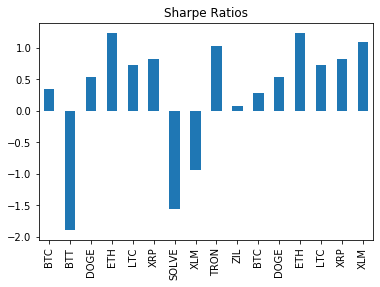

In [7]:
sharpe_ratio.plot.bar(title='Sharpe Ratios')